#  <u>Super Store Orders Analysis

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Collecting Data(read)

In [2]:
df = pd.read_csv('SuperStoreOrders.csv', parse_dates=['order_date'], dayfirst=True)

In [3]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [4]:
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,4/1/2015,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,2014
51286,MO-2014-2560,2014-12-31,5/1/2015,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,2014
51287,MX-2014-110527,2014-12-31,2/1/2015,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium,2014
51288,MX-2014-114783,2014-12-31,6/1/2015,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium,2014
51289,CA-2014-156720,2014-12-31,4/1/2015,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3,3,0.2,-0.6048,0.17,Medium,2014


# Cleaning the Data and Examining

In [5]:
df.drop(columns=["order_id","ship_date","ship_mode","customer_name","state","country","region","product_id","product_name","order_priority","shipping_cost","year"], inplace=True)

In [6]:
df.head()

,order_date,segment,market,category,sub_category,sales,quantity,discount,profit
0,2011-01-01,Consumer,Africa,Office Supplies,Storage,408,2,0.0,106.140
1,2011-01-01,Consumer,APAC,Office Supplies,Supplies,120,3,0.1,36.036
2,2011-01-01,Consumer,EMEA,Office Supplies,Storage,66,4,0.0,29.640
3,2011-01-01,Home Office,EU,Office Supplies,Paper,45,3,0.5,-26.055
4,2011-01-01,Consumer,APAC,Furniture,Furnishings,114,5,0.1,37.770


In [7]:
print("segment :",df["segment"].unique())
print("market :",df["market"].unique())
print("category :",df["category"].unique())
print("sub_category :",df["sub_category"].unique())

segment : ['Consumer' 'Home Office' 'Corporate']
market : ['Africa' 'APAC' 'EMEA' 'EU' 'Canada' 'LATAM' 'US']
category : ['Office Supplies' 'Furniture' 'Technology']
sub_category : ['Storage' 'Supplies' 'Paper' 'Furnishings' 'Machines' 'Appliances'
 'Copiers' 'Chairs' 'Tables' 'Bookcases' 'Phones' 'Accessories' 'Labels'
 'Art' 'Envelopes' 'Fasteners' 'Binders']


In [8]:
df.describe()

,quantity,discount,profit
count,51290.000000,51290.000000,51290.000000
mean,3.476545,0.142908,28.641740
std,2.278766,0.212280,174.424113
min,1.000000,0.000000,-6599.978000
25%,2.000000,0.000000,0.000000
50%,3.000000,0.000000,9.240000
75%,5.000000,0.200000,36.810000
max,14.000000,0.850000,8399.976000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_date    51290 non-null  datetime64[ns]
 1   segment       51290 non-null  object        
 2   market        51290 non-null  object        
 3   category      51290 non-null  object        
 4   sub_category  51290 non-null  object        
 5   sales         51290 non-null  object        
 6   quantity      51290 non-null  int64         
 7   discount      51290 non-null  float64       
 8   profit        51290 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 3.5+ MB


In [10]:
df['sales'] = df['sales'].str.replace(',', '').astype(int)

In [11]:
df.isna().sum()

order_date      0
segment         0
market          0
category        0
sub_category    0
sales           0
quantity        0
discount        0
profit          0
dtype: int64

# Visualizing the Data

# Bar Graph showing relation between Market-Sales & Market-Profit

Text(0.5, 1.0, 'Profit')

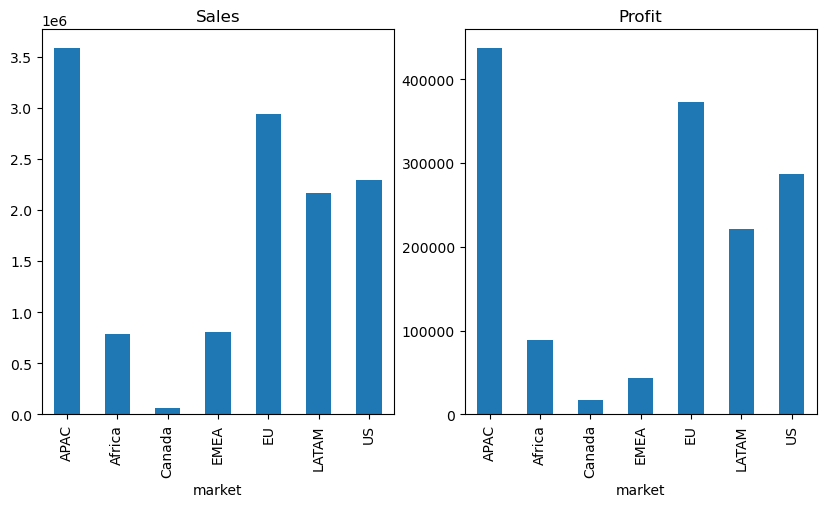

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
df.groupby("market")["sales"].sum().plot.bar(ax=ax1)
ax1.set_title('Sales')
df.groupby("market")["profit"].sum().plot.bar(ax=ax2)
ax2.set_title('Profit')

# Pie Chart showing relation between Market-Sales & Market-Profit

Text(0.5, 1.0, 'Profits')

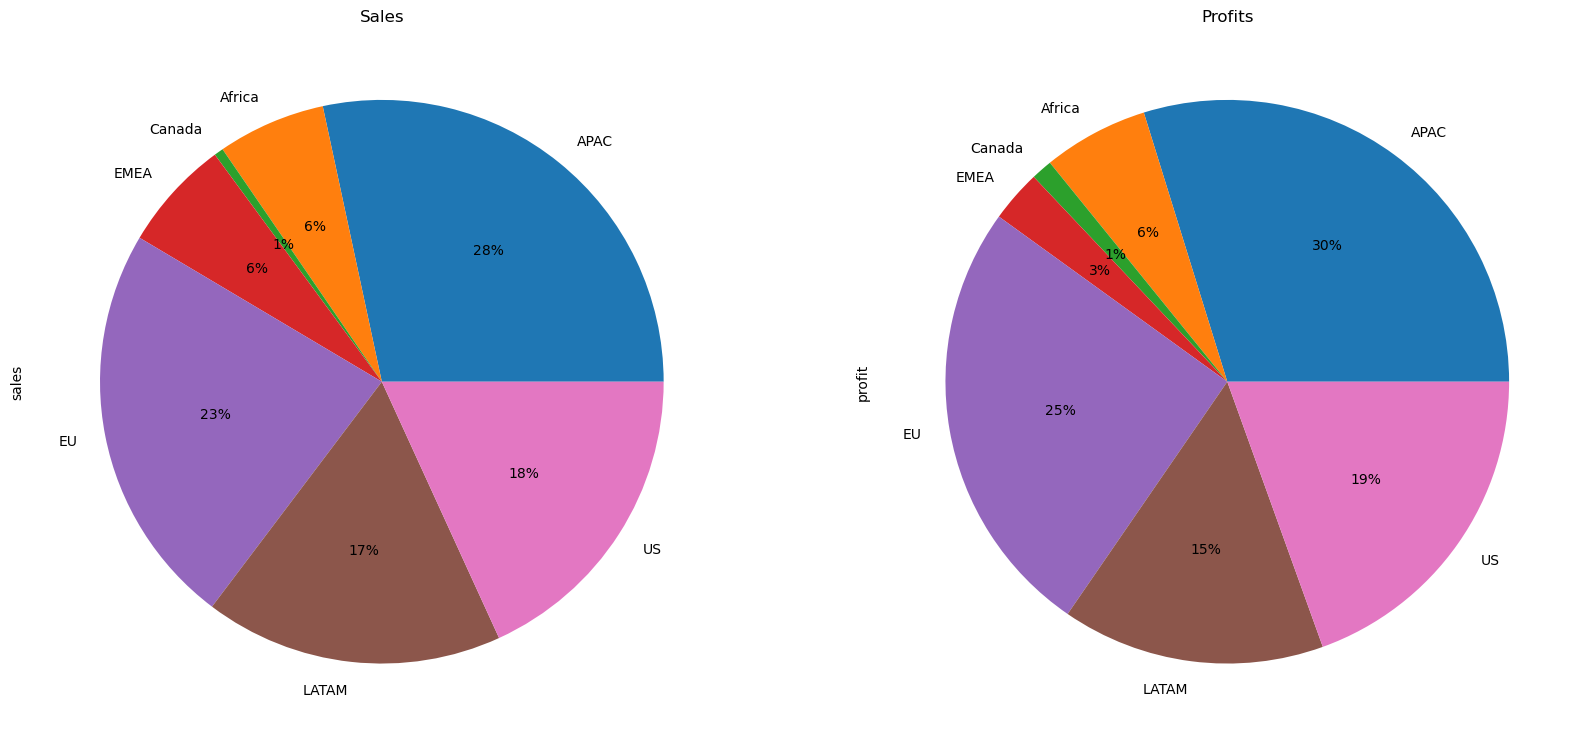

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
df.groupby("market")["sales"].sum().plot.pie(ax=ax1,autopct="%1.0f%%")
ax1.set_title('Sales')
df.groupby("market")["profit"].sum().plot.pie(ax=ax2,autopct="%1.0f%%")
ax2.set_title('Profits')

# Bar Graph showing relation between Category-Sales & Category-Profit

Text(0.5, 1.0, 'Profit')

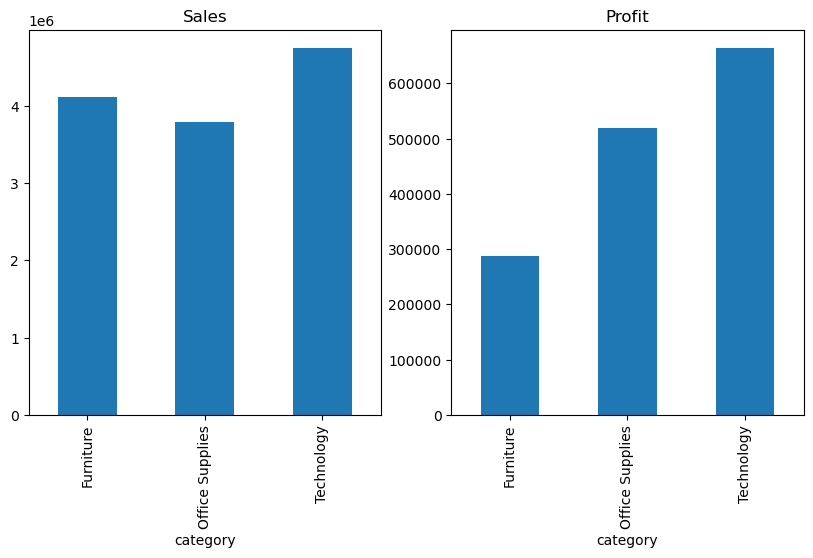

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
df.groupby("category")["sales"].sum().plot.bar(ax=ax1)
ax1.set_title('Sales')
df.groupby("category")["profit"].sum().plot.bar(ax=ax2)
ax2.set_title('Profit')

# Pie Chart showing relation between Category-Sales & Category-Profit

Text(0.5, 1.0, 'Profit')

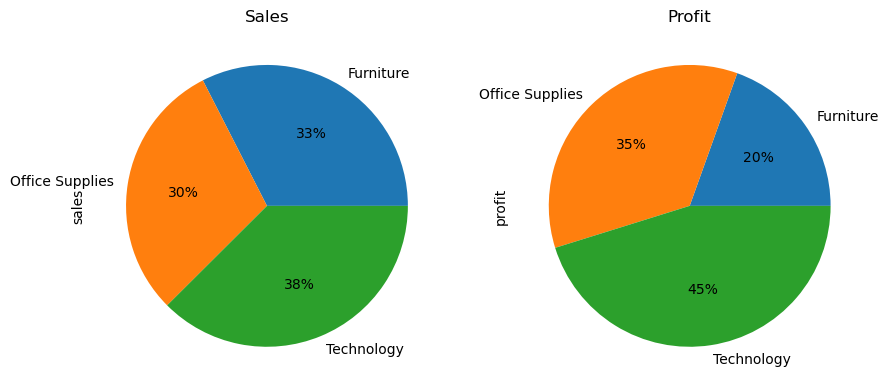

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
df.groupby("category")["sales"].sum().plot.pie(ax=ax1,autopct="%1.0f%%")
ax1.set_title('Sales')
df.groupby("category")["profit"].sum().plot.pie(ax=ax2,autopct="%1.0f%%")
ax2.set_title('Profit')

# Bar Graph showing relation between Market-Category

<Axes: xlabel='market,category'>

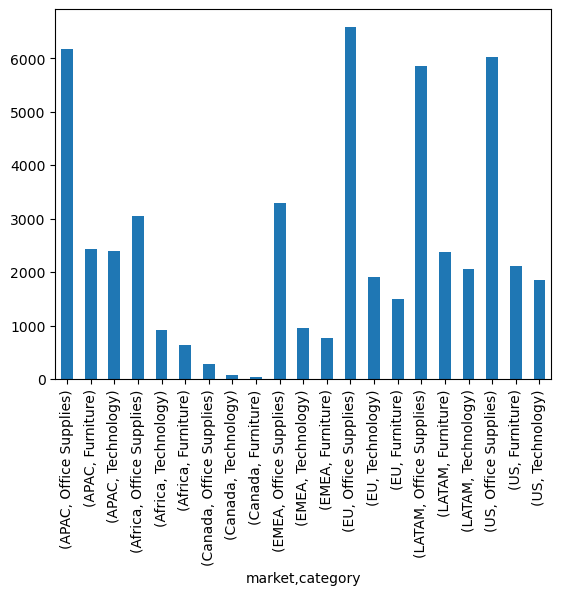

In [16]:
df.groupby("market")["category"].value_counts().plot.bar()

# Bar Graph showing relation between SubCategory-Sales-Profit

C:\Users\Siddhant\AppData\Local\Temp\ipykernel_17176\3326796511.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("sub_category")["sales","profit"].sum().plot.bar().set_title("Sub-Category and Sales Profit Graph")


Text(0.5, 1.0, 'Sub-Category and Sales Profit Graph')

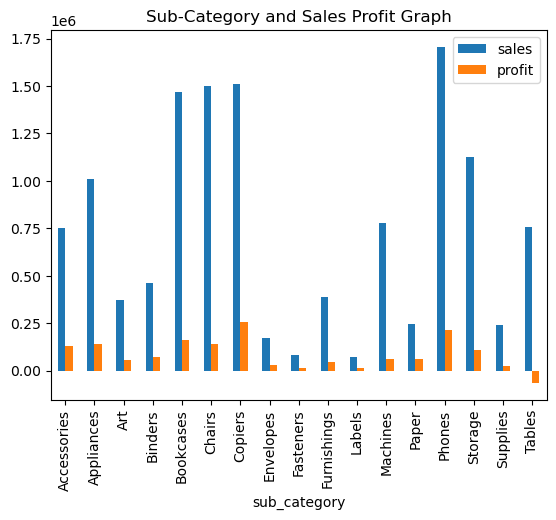

In [17]:
df.groupby("sub_category")["sales","profit"].sum().plot.bar().set_title("Sub-Category and Sales Profit Graph")

# Line Graph showing relation between Months-Year with Sales

In [18]:
df['order_date']=df['order_date'].astype(str)

In [19]:
df['months']=df['order_date'].str[:7]
df.head()

,order_date,segment,market,category,sub_category,sales,quantity,discount,profit,months
0,2011-01-01,Consumer,Africa,Office Supplies,Storage,408,2,0.0,106.140,2011-01
1,2011-01-01,Consumer,APAC,Office Supplies,Supplies,120,3,0.1,36.036,2011-01
2,2011-01-01,Consumer,EMEA,Office Supplies,Storage,66,4,0.0,29.640,2011-01
3,2011-01-01,Home Office,EU,Office Supplies,Paper,45,3,0.5,-26.055,2011-01
4,2011-01-01,Consumer,APAC,Furniture,Furnishings,114,5,0.1,37.770,2011-01


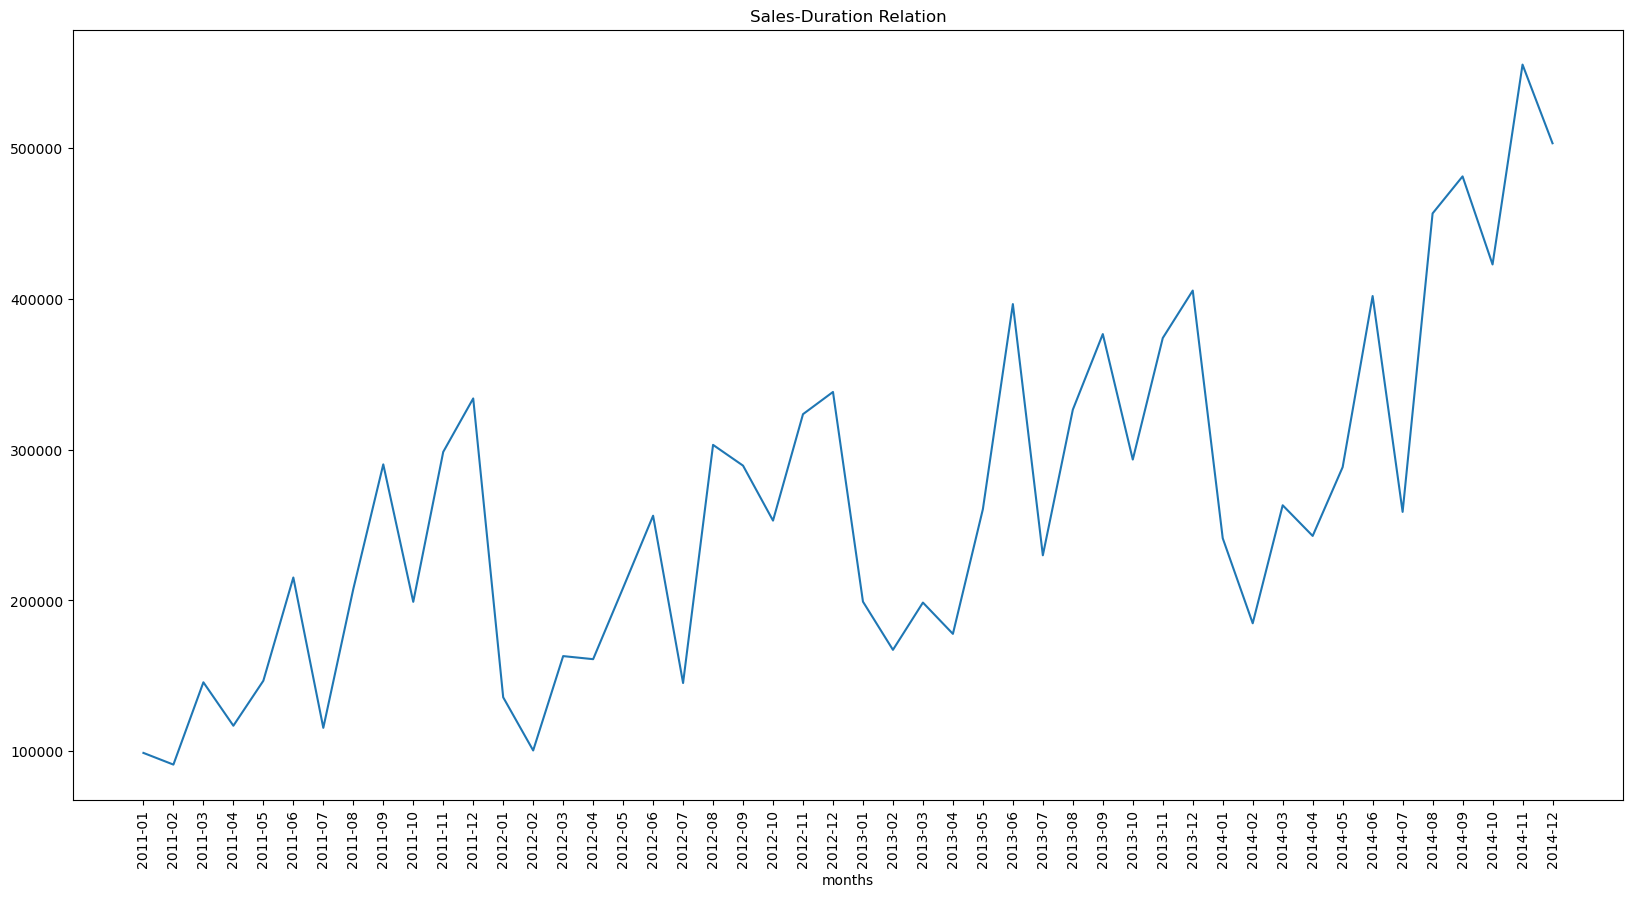

In [28]:
monthly_sales = df.groupby('months')['sales'].sum()
plt.figure(figsize=(20, 10))
plt.title("Sales-Duration Relation")
monthly_sales.plot.line()
plt.xticks(range(len(monthly_sales.index)), monthly_sales.index, rotation=90)
plt.show()